In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statistics

In [2]:
filename = 'BigQuery_Results.csv'
pd.options.display.max_rows = 9999
df = pd.read_csv(filename)

#print(f"iperf_interval_throughput_list: {type(df)}")

df.sort_values(by=['date_time', 'run_uri'], inplace=True, ascending=True)
df = df.set_index('thedate')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
df.head()

,sample_uri,run_uri,value,unit,date_time,vm_1_cloud,vm_2_cloud,vm_1_zone,vm_2_zone,sending_zone,receiving_zone,sending_region,receiving_region,sending_machine_type,receiving_machine_type,sending_thread_count,ip_type,network_tier,vm_2_gce_network_tier,buffer_size,congestion_window,err_packet_count,interval_length_seconds,netpwr,receiving_machine_mtu,sending_machine_mtu,retry_packet_count,rtt_us,runtime_in_seconds,tcp_window_size,transfer,vm_1_tcp_congestion_control,vm_2_tcp_congestion_control,write_packet_count,iperf_interval_cwnd_list,iperf_interval_netpwr_list,iperf_interval_length_seconds,iperf_interval_rtt_list,iperf_interval_start_time_list,iperf_interval_throughput_list,iperf_transfer_mbytes,vm_1_machine_type,vm_2_machine_type,vm_1_kernel_release,vm_2_kernel_release,rmem_max,tcp_max_receive_buffer,tcp_max_send_buffer,vm_1_wmem_max
thedate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-06 04:05:01.04905 UTC,310ca9e8-9cea-4ebb-907d-65cb95da7804,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,6347.0,Mbits/sec,2021-11-06 04:05:01 UTC,GCP,GCP,us-east1-b,us-west1-b,us-east1-b,us-west1-b,us-east1,us-west1,n1-standard-16,n1-standard-16,1,external,standard,standard,0.12,-1.0000,0,0.5,12313.700000,1500,1500,0,64427.0000,15,0.12,NaN,bbr,bbr,90834,"['14', '1457', '108803', '112709', '106357', '...","['310.13', '20017.74', '12128.08', '13701.47',...",0.5,"['65086', '63435', '63547', '63654', '64202', ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","['161', '10159', '6166', '6977', '6560', '6568...",11354.0,n1-standard-16,n1-standard-16,5.4.0-1056-gcp,5.4.0-1056-gcp,212992,500000000,500000000,212992
2021-11-06 04:05:21.7302 UTC,66a19144-c727-47a0-ab96-cd90f8190cb5,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,7812.0,Mbits/sec,2021-11-06 04:05:21 UTC,GCP,GCP,us-east1-b,us-west1-b,us-east1-b,us-west1-b,us-east1,us-west1,n1-standard-16,n1-standard-16,1,internal,standard,standard,0.12,-1.0000,1,0.5,15156.420000,1500,1500,199615,64431.0000,15,0.12,NaN,bbr,bbr,112848,"['14', '1510', '140147', '140704', '138153', '...","['311.73', '21118.55', '14847.32', '14757.86',...",0.5,"['64752', '63331', '64974', '64835', '65190', ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","['161', '10700', '7718', '7655', '8496', '8173...",14106.0,n1-standard-16,n1-standard-16,5.4.0-1056-gcp,5.4.0-1056-gcp,212992,500000000,500000000,212992
2021-11-06 04:05:42.834408 UTC,71787bef-7468-4cb6-a83a-ad7534b2b8fc,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,6555.0,Mbits/sec,2021-11-06 04:05:42 UTC,GCP,GCP,us-east1-b,us-west1-b,us-west1-b,us-east1-b,us-west1,us-east1,n1-standard-16,n1-standard-16,1,external,standard,standard,0.12,-1.0000,0,0.5,12856.490000,1500,1500,514818,63736.0000,15,0.12,NaN,bbr,bbr,94257,"['14', '1443', '142164', '139822', '143255', '...","['310.58', '18783.36', '16031.70', '10105.18',...",0.5,"['64992', '63498', '63853', '64468', '63620', ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","['161', '9542', '8189', '5212', '7984', '5732'...",11781.0,n1-standard-16,n1-standard-16,5.4.0-1056-gcp,5.4.0-1056-gcp,212992,500000000,500000000,212992
2021-11-06 04:06:03.387415 UTC,27897667-77ff-4495-83a8-0e9d6b0b8335,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,8167.0,Mbits/sec,2021-11-06 04:06:03 UTC,GCP,GCP,us-east1-b,us-west1-b,us-west1-b,us-east1-b,us-west1,us-east1,n1-standard-16,n1-standard-16,1,internal,standard,standard,0.12,-1.0000,0,0.5,15885.050000,1500,1500,222227,64268.0000,15,0.12,NaN,bbr,bbr,116835,"['14', '1494', '134706', '139610', '138057', '...","['312.49', '17747.49', '17084.89', '17324.97',...",0.5,"['64595', '63261', '68632', '64337', '63862', ...","[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, ...","['161', '8982', '9381', '8917', '8638', '8321'...",14604.0,n1-standard-16,n1-standard-16,5.4.0-1056-gcp,5.4.0-1056-gcp,212992,500000000,500000000,212992
2021-11-06 04:06:24.202496 UTC,074e2dde-28e6-4966-97cc-6b982e4f26ba,41407644-b450f5a5-26f4-4a16-87bb-cb71a7fbe5d3,7969.0,Mbits/sec,2021-11-06 04:06:24 UTC,GC

In [3]:
df.columns

Index(['sample_uri', 'run_uri', 'value', 'unit', 'date_time', 'vm_1_cloud',
       'vm_2_cloud', 'vm_1_zone', 'vm_2_zone', 'sending_zone',
       'receiving_zone', 'sending_region', 'receiving_region',
       'sending_machine_type', 'receiving_machine_type',
       'sending_thread_count', 'ip_type', 'network_tier',
       'vm_2_gce_network_tier', 'buffer_size', 'congestion_window',
       'err_packet_count', 'interval_length_seconds', 'netpwr',
       'receiving_machine_mtu', 'sending_machine_mtu', 'retry_packet_count',
       'rtt_us', 'runtime_in_seconds', 'tcp_window_size', 'transfer',
       'vm_1_tcp_congestion_control', 'vm_2_tcp_congestion_control',
       'write_packet_count', 'iperf_interval_cwnd_list',
       'iperf_interval_netpwr_list', 'iperf_interval_length_seconds',
       'iperf_interval_rtt_list', 'iperf_interval_start_time_list',
       'iperf_interval_throughput_list', 'iperf_transfer_mbytes',
       'vm_1_machine_type', 'vm_2_machine_type', 'vm_1_kernel_release',
  

In [4]:
df = df[df['ip_type'] == 'internal']
df = df[df['sending_thread_count'] == 32]

In [5]:
gb = df.groupby(['sending_zone',
                 'receiving_zone',
                 'tcp_max_receive_buffer',
                 'vm_1_machine_type',
                 'sending_thread_count',
                 'ip_type',
                 'network_tier',
                 'runtime_in_seconds'
                ], 
                as_index=False)[[
                    'sample_uri',
                    'run_uri',
                    'value', 
                    'unit', 
                    'date_time', 
#                     'vm_1_cloud',
#                     'vm_2_cloud', 
#                     'vm_1_zone',
#                     'vm_2_zone',
                    'sending_zone',
                    'receiving_zone',
                    'sending_region',
                    'receiving_region',
                    'sending_machine_type',
                    'receiving_machine_type',
                    'runtime_in_seconds',
                    'ip_type',
                    'sending_thread_count',
#                     'vm_2_gce_network_tier',
                    'buffer_size',
                    'congestion_window',
                    'err_packet_count',
                    'interval_length_seconds', 
                    'netpwr',
                    'receiving_machine_mtu',
                    'sending_machine_mtu',
                    'retry_packet_count',
                    'rtt_us',
                    'tcp_window_size',
                    'transfer',
                    'vm_1_tcp_congestion_control',
                    'vm_2_tcp_congestion_control',
                    'write_packet_count',
                    'iperf_interval_cwnd_list',
                    'iperf_interval_netpwr_list',
                    'iperf_interval_length_seconds',
                    'iperf_interval_rtt_list', 
                    'iperf_interval_start_time_list',
                    'iperf_interval_throughput_list',
                    'iperf_transfer_mbytes',
                    'vm_1_machine_type',
                    'vm_2_machine_type',
                    'vm_1_kernel_release',
                    'vm_2_kernel_release',
                    'rmem_max',
                    'tcp_max_receive_buffer',
                    'tcp_max_send_buffer', 
                    'vm_1_wmem_max'
                                ]]
list(gb.groups)[0:5]

[('asia-east1-b',
  'us-central1-a',
  500000000,
  'n1-standard-16',
  32,
  'internal',
  'standard',
  15),
 ('asia-east1-b',
  'us-central1-a',
  500000000,
  'n1-standard-16',
  32,
  'internal',
  'standard',
  30),
 ('asia-east1-b',
  'us-central1-a',
  500000000,
  'n1-standard-16',
  32,
  'internal',
  'standard',
  45),
 ('asia-east1-b',
  'us-central1-a',
  500000000,
  'n1-standard-16',
  32,
  'internal',
  'standard',
  60),
 ('asia-east1-b',
  'us-central1-a',
  500000000,
  'n1-standard-16',
  32,
  'internal',
  'standard',
  75)]

In [6]:
group_list = list(gb.groups)
g = group_list[0]
print(f"Group List is: {len(gb.groups)}")

Group List is: 192


In [7]:
g

('asia-east1-b',
 'us-central1-a',
 500000000,
 'n1-standard-16',
 32,
 'internal',
 'standard',
 15)

In [8]:
group = gb.get_group(g)

In [9]:
int(group['runtime_in_seconds'].unique()[0])

15

In [10]:
group['value']

thedate
2021-11-06 11:17:08.59245 UTC     15669.0
2021-11-07 14:32:38.385451 UTC    10211.0
2021-11-08 17:40:11.920307 UTC     9292.0
2021-11-09 20:34:16.807616 UTC    11326.0
2021-11-10 23:05:40.134381 UTC     7152.0
                                   ...   
2022-02-02 06:09:59.364464 UTC    10166.0
2022-02-03 08:42:06.610548 UTC    10667.0
2022-02-04 11:20:23.263792 UTC     9968.0
2022-02-05 14:35:41.877992 UTC    10105.0
2022-02-06 16:57:15.608121 UTC     9717.0
Name: value, Length: 62, dtype: float64

In [11]:
statistics.variance(group['value'])

2708953.5930724484

In [12]:
statistics.mean(group['rtt_us'])/1000

160.4643519153226

In [13]:
statistics.median(group['rtt_us'])/1000

160.56046875

### TODO Here I want to get the statistics of of each run time at each latency level

So the graph should have latency in the X axis and throughput and variance in the y axis
Then each line on the graph should correspond to a different run_time

In [14]:
stats_dict = {}

group_list = list(gb.groups)
for g in group_list:
  runtime_in_seconds = int(group['runtime_in_seconds'].unique()[0])
  if runtime_in_seconds not in stats_dict:
    stats_dict[runtime_in_seconds] = []
  
  group = gb.get_group(g)
  median_throughput = statistics.median(group['value'])
  mean_throughput = statistics.mean(group['value'])
  throughput_variance = statistics.variance(group['value'])
  median_rtt = statistics.median(group['rtt_us'])/1000
  
  stats_dict[runtime_in_seconds].append((median_rtt, median_throughput, mean_throughput, throughput_variance))
  

In [15]:
list(stats_dict.keys())

[15, 30, 45, 60, 75, 90, 105, 120]

In [16]:
for runtime in list(stats_dict.keys()):
  stats_dict[runtime].sort(key = lambda x: x[0]) 

In [17]:
stats_dict[120]

[(32.93132708333333, 10340.0, 10441.936507936507, 4696703.737839222),
 (33.45881354166667, 7370.0, 7734.825396825397, 847103.7916026625),
 (35.09681666666667, 8780.0, 8723.222222222223, 862388.046594982),
 (36.126441666666665, 10195.0, 10390.333333333334, 4653588.354838709),
 (39.91363958333333, 10423.0, 10339.507936507936, 3043060.286226318),
 (40.52951666666667, 7346.0, 7637.0, 677353.7096774194),
 (42.654284375, 9002.0, 8851.317460317461, 399729.9298515105),
 (43.28265416666667, 10438.0, 10377.698412698413, 2079359.149513569),
 (64.88344010416667, 16756.5, 15677.328125, 8680737.144593254),
 (64.88540885416666, 16726.5, 15552.71875, 8480124.87202381),
 (65.29609270833333, 9516.0, 9319.393442622952, 432943.30928961746),
 (65.306015625, 9534.0, 9079.688524590163, 1331751.5846994536),
 (120.12167239583333, 16161.5, 16290.5, 80837.49206349206),
 (120.122734375, 16130.5, 16202.765625, 257917.73784722222),
 (120.32850260416667, 9196.0, 9193.033333333333, 1373.1175141242938),
 (120.35325677

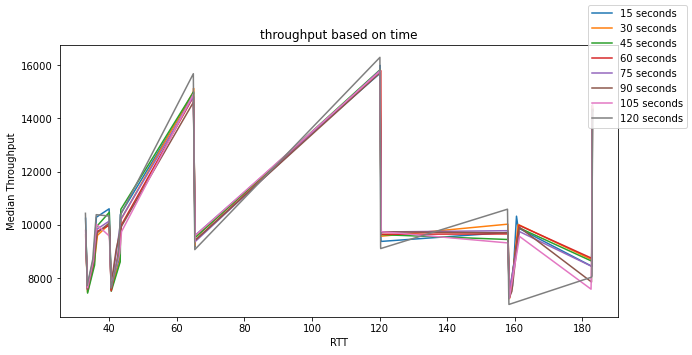

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

key_list = list(stats_dict.keys())
key_list.sort()
for runtime in key_list:
  runtime_stats = list(zip(*stats_dict[runtime]))
  
  label = f'{runtime} seconds'           
  ax.plot(runtime_stats[0],
          runtime_stats[2],
           label = label)

  handles, labels = ax.get_legend_handles_labels()
ax.set_title(f'throughput based on time')
fig.legend(handles, labels)
# fig.suptitle(f"Compare different streams and error rates for {dist} error distribution with CUBIC")
# ax.yaxis.grid(True)
# ax.set_xticks([y + 1 for y in range(10)])
ax.set_xlabel('RTT')
ax.set_ylabel('Median Throughput')
plt.show()
plt.close()

## This shows that there isn't that much difference in the measured throughput between 15 second and 120 seconds in a lot of cases

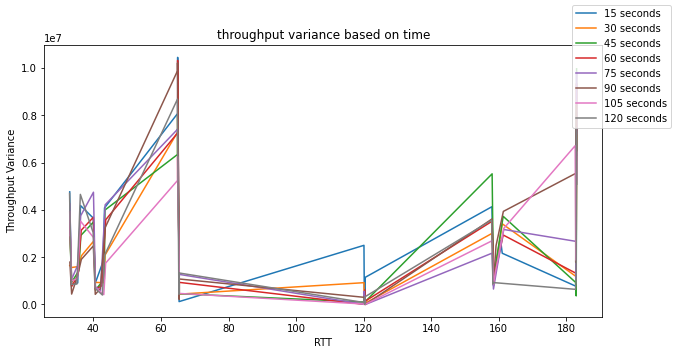

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

key_list = list(stats_dict.keys())
key_list.sort()
for runtime in key_list:
  runtime_stats = list(zip(*stats_dict[runtime]))
  
  label = f'{runtime} seconds'           
  ax.plot(runtime_stats[0],
          runtime_stats[3],
           label = label)

  handles, labels = ax.get_legend_handles_labels()
ax.set_title(f'throughput variance based on time')
fig.legend(handles, labels)
# fig.suptitle(f"Compare different streams and error rates for {dist} error distribution with CUBIC")
# ax.yaxis.grid(True)
# ax.set_xticks([y + 1 for y in range(10)])
ax.set_xlabel('RTT')
ax.set_ylabel('Throughput Variance')
plt.show()
plt.close()

## Now let's look at iperf intervals

In [37]:
temp_list_list = []

for index, row in group.iterrows():
#   print(row)
  throughput_list_string = row['iperf_interval_throughput_list']
  throughput_list_string = throughput_list_string.replace('[', '')
  throughput_list_string = throughput_list_string.replace("'", "")
  throughput_list_string = throughput_list_string.replace(']', '')
  throughput_list_string = throughput_list_string.replace(',', '')
  throughput_list = list(map(float, throughput_list_string.split(' ')))
  temp_list_list.append(throughput_list)
  

mean_interval_list = list(map(statistics.mean, zip(*temp_list_list)))
median_interval_list = list(map(statistics.median, zip(*temp_list_list)))
mean_variance_over_intervals = statistics.mean(map(statistics.variance, temp_list_list))
median_variance_over_intervals = statistics.median(map(statistics.variance, temp_list_list))

In [43]:
statistics.mean(map(statistics.variance, temp_list_list))

54342158.70650723

In [79]:
interval_stats_dict = {}

group_list = list(gb.groups)
for g in group_list:
  group = gb.get_group(g)
  runtime_in_seconds = int(group['runtime_in_seconds'].unique()[0])
  if runtime_in_seconds not in interval_stats_dict:
    interval_stats_dict[runtime_in_seconds] = []
  
  temp_stats_dict = {}
  temp_list_list = []

  for index, row in group.iterrows():
    throughput_list_string = row['iperf_interval_throughput_list']
    throughput_list_string = throughput_list_string.replace('[', '')
    throughput_list_string = throughput_list_string.replace("'", "")
    throughput_list_string = throughput_list_string.replace(']', '')
    throughput_list_string = throughput_list_string.replace(',', '')
    throughput_list = list(map(float, throughput_list_string.split(' ')))
    temp_list_list.append(throughput_list)

  temp_stats_dict['mean_interval_list'] = list(map(statistics.mean, zip(*temp_list_list)))
  temp_stats_dict['median_interval_list'] = list(map(statistics.median, zip(*temp_list_list)))
  temp_stats_dict['mean_variance_over_intervals'] = statistics.mean(map(statistics.variance, temp_list_list))
  temp_stats_dict['median_variance_over_intervals'] = statistics.median(map(statistics.variance, temp_list_list))
  temp_stats_dict['median_stdev_over_intervals'] = statistics.median(map(statistics.stdev, temp_list_list))
  temp_stats_dict['mean_stdev_over_intervals'] = statistics.mean(map(statistics.stdev, temp_list_list))
  
  rtt = statistics.median(group['rtt_us'])/1000
  temp_stats_dict['rtt'] = rtt
  interval_stats_dict[runtime_in_seconds].append((rtt,temp_stats_dict))

In [80]:
key_list = list(interval_stats_dict.keys())
key_list.sort()
for runtime_in_seconds in key_list:
  interval_stats_dict[runtime_in_seconds].sort(key = lambda x: x[0]) 

In [81]:
interval_stats_dict[15][0]

(32.93132708333333,
 {'mean_interval_list': [22445.126984126986,
   14778.952380952382,
   10373.761904761905,
   10125.349206349207,
   10063.15873015873,
   10135.301587301587,
   10249.222222222223,
   9946.063492063493,
   10225.904761904761,
   10189.15873015873,
   9754.317460317461,
   10179.492063492064,
   10226.20634920635,
   10214.857142857143,
   9832.47619047619,
   10050.587301587302,
   10132.666666666666,
   10090.873015873016,
   9861.555555555555,
   10240.587301587302,
   8261.507936507936,
   10037.587301587302,
   10038.047619047618,
   10398.142857142857,
   10234.396825396825,
   10244.15873015873,
   9765.126984126984,
   10188.619047619048,
   10337.47619047619,
   9885.936507936507],
  'median_interval_list': [21787.0,
   15147.0,
   10051.0,
   10025.0,
   9994.0,
   10044.0,
   10161.0,
   9970.0,
   9953.0,
   10071.0,
   9598.0,
   9951.0,
   10234.0,
   10014.0,
   9711.0,
   9859.0,
   9913.0,
   10162.0,
   9894.0,
   10062.0,
   8110.0,
   10090.0,
  

In [90]:
# get list of mean_stdev_over_intervals from dictionary structure
list(map(lambda x: x['mean_stdev_over_intervals'], iter(list(zip(*interval_stats_dict[15]))[1])))

[2637.2014106079487,
 839.8230853838573,
 874.6757879093138,
 2448.123641102509,
 2826.2149185920625,
 889.7755781493805,
 1048.22072868083,
 2423.156912467449,
 8156.363259457083,
 8181.655507179381,
 1198.498798734203,
 1115.9283253078193,
 8261.209493483591,
 8273.82347797935,
 1918.2975628495421,
 1932.4937505145276,
 7927.91224273976,
 2415.640557448368,
 2136.3339079334673,
 7300.366192656722,
 2587.65955162762,
 2571.7949547180256,
 6741.25744834215,
 6889.261527242118]

In [82]:
start_times = list(map(lambda x: x/2, range(0,60,1)))

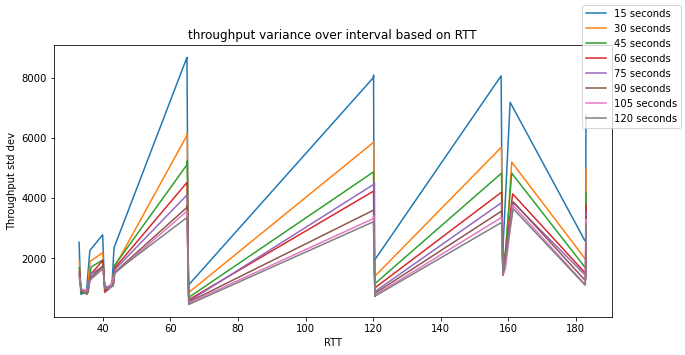

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

key_list = list(interval_stats_dict.keys())
key_list.sort()
for runtime in key_list:
  
  label = f'{runtime} seconds'           
  ax.plot(list(map(lambda x: x['rtt'], iter(list(zip(*interval_stats_dict[runtime]))[1]))),
          list(map(lambda x: x['median_stdev_over_intervals'], iter(list(zip(*interval_stats_dict[runtime]))[1]))),
           label = label)

  handles, labels = ax.get_legend_handles_labels()
ax.set_title(f'throughput variance over interval based on RTT')
fig.legend(handles, labels)
# fig.suptitle(f"Compare different streams and error rates for {dist} error distribution with CUBIC")
# ax.yaxis.grid(True)
# ax.set_xticks([y + 1 for y in range(10)])
ax.set_xlabel('RTT')
ax.set_ylabel('Throughput std dev')
plt.show()
plt.close()

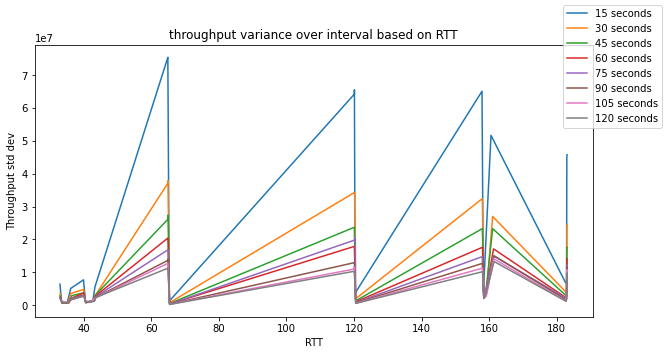

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

key_list = list(interval_stats_dict.keys())
key_list.sort()
for runtime in key_list:
  
  label = f'{runtime} seconds'           
  ax.plot(list(map(lambda x: x['rtt'], iter(list(zip(*interval_stats_dict[runtime]))[1]))),
          list(map(lambda x: x['median_variance_over_intervals'], iter(list(zip(*interval_stats_dict[runtime]))[1]))),
           label = label)

  handles, labels = ax.get_legend_handles_labels()
ax.set_title(f'throughput variance over interval based on RTT')
fig.legend(handles, labels)
# fig.suptitle(f"Compare different streams and error rates for {dist} error distribution with CUBIC")
# ax.yaxis.grid(True)
# ax.set_xticks([y + 1 for y in range(10)])
ax.set_xlabel('RTT')
ax.set_ylabel('Throughput std dev')
plt.show()
plt.close()

### I think this doesn't actually show us much
its just saying the variance over a 15 second period is higher than the variance over a 120 second period, which makes sense
because we know it takes a few seconds for the measurement to stabalize. 
interval_stats_dict[runtime]
I think we need measurements with a shorter RTT to be effective

32.972428515625

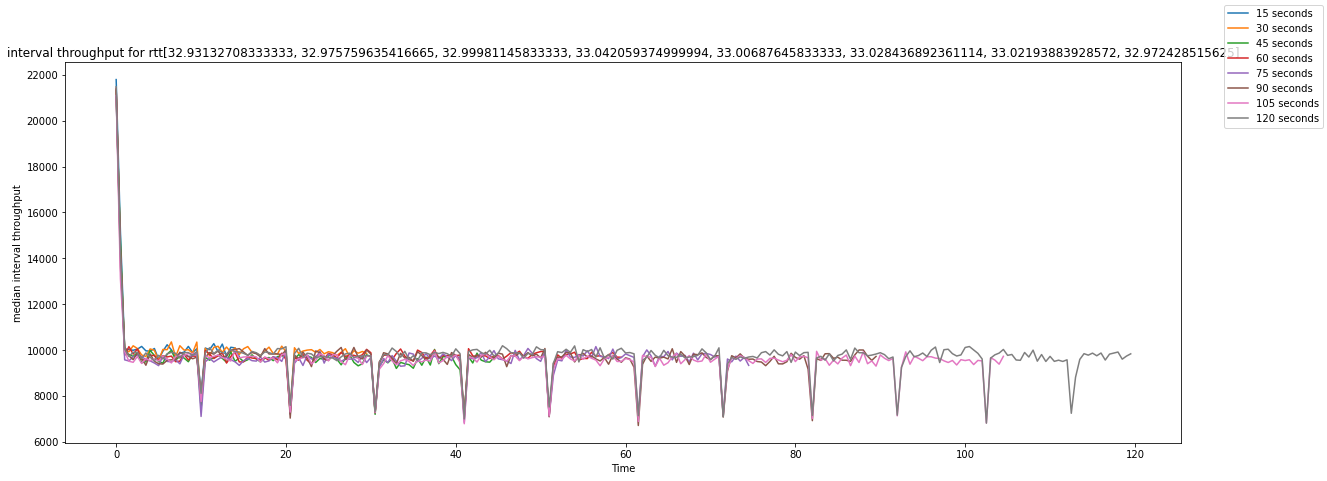

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

key_list = list(interval_stats_dict.keys())
key_list.sort()
rtt_list = []
for runtime in key_list:
  rtt_list.append(interval_stats_dict[runtime][0][0])
  label = f'{runtime} seconds'    
  interval_list = list(map(lambda x: x['median_interval_list'], iter(list(zip(*interval_stats_dict[runtime]))[1])))[0]
  start_times = list(map(lambda x: x/2, range(0,len(interval_list),1)))
  ax.plot(start_times,
          interval_list,
           label = label)

  handles, labels = ax.get_legend_handles_labels()
ax.set_title(f'interval throughput for rtt{str(rtt_list)}')
fig.legend(handles, labels)
# fig.suptitle(f"Compare different streams and error rates for {dist} error distribution with CUBIC")
# ax.yaxis.grid(True)
# ax.set_xticks([y + 1 for y in range(10)])
ax.set_xlabel('Time')
ax.set_ylabel('median interval throughput')
plt.show()
plt.close()

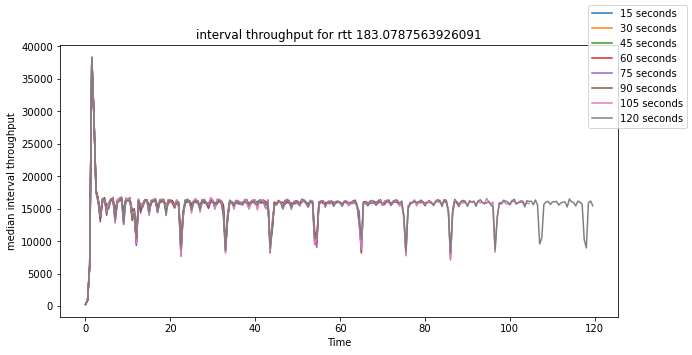

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

key_list = list(interval_stats_dict.keys())
key_list.sort()
rtt_list = []
for runtime in key_list:
  rtt_list.append(interval_stats_dict[runtime][-1][0])
  label = f'{runtime} seconds'    
  interval_list = list(map(lambda x: x['median_interval_list'], iter(list(zip(*interval_stats_dict[runtime]))[1])))[-1]
  start_times = list(map(lambda x: x/2, range(0,len(interval_list),1)))
  ax.plot(start_times,
          interval_list,
           label = label)

  handles, labels = ax.get_legend_handles_labels()
ax.set_title(f'interval throughput for rtt {str(statistics.mean(rtt_list))}')
fig.legend(handles, labels)
# fig.suptitle(f"Compare different streams and error rates for {dist} error distribution with CUBIC")
# ax.yaxis.grid(True)
# ax.set_xticks([y + 1 for y in range(10)])
ax.set_xlabel('Time')
ax.set_ylabel('median interval throughput')
plt.show()
plt.close()

## What is this weird pattern??